<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on Lab: Build an Interactive Dashboard with Ploty Dash**


<span style = 'color: green'><b>In this lab, you will be building a Plotly Dash application for users to perform interactive visual analytics on SpaceX launch data in real-time.</b></span>

<span style = 'color: green'><b>This dashboard application contains input components such as a dropdown list and a range slider to interact with a pie chart and a scatter point chart. You will be guided to build this dashboard application via the following tasks:</b></span>

 - **TASK 1:** Add a Launch Site Drop-down Input Component
 - **TASK 2:** Add a callback function to render success-pie-chart based on selected site dropdown
 - **TASK 3:** Add a Range Slider to Select Payload
 - **TASK 4:** Add a callback function to render the success-payload-scatter-chart scatter plot

<span style = 'color: darkorange'><b>Note:Please take screenshots of the Dashboard and save them. Further upload your notebook to github.</b></span>

<span style = 'color: darkorange'><b>The github url and the screenshots are later required in the presentation slides.</b></span>

<span style = 'color: darkorange'><b>Your completed dashboard application should look like the following screenshot:</b></span>


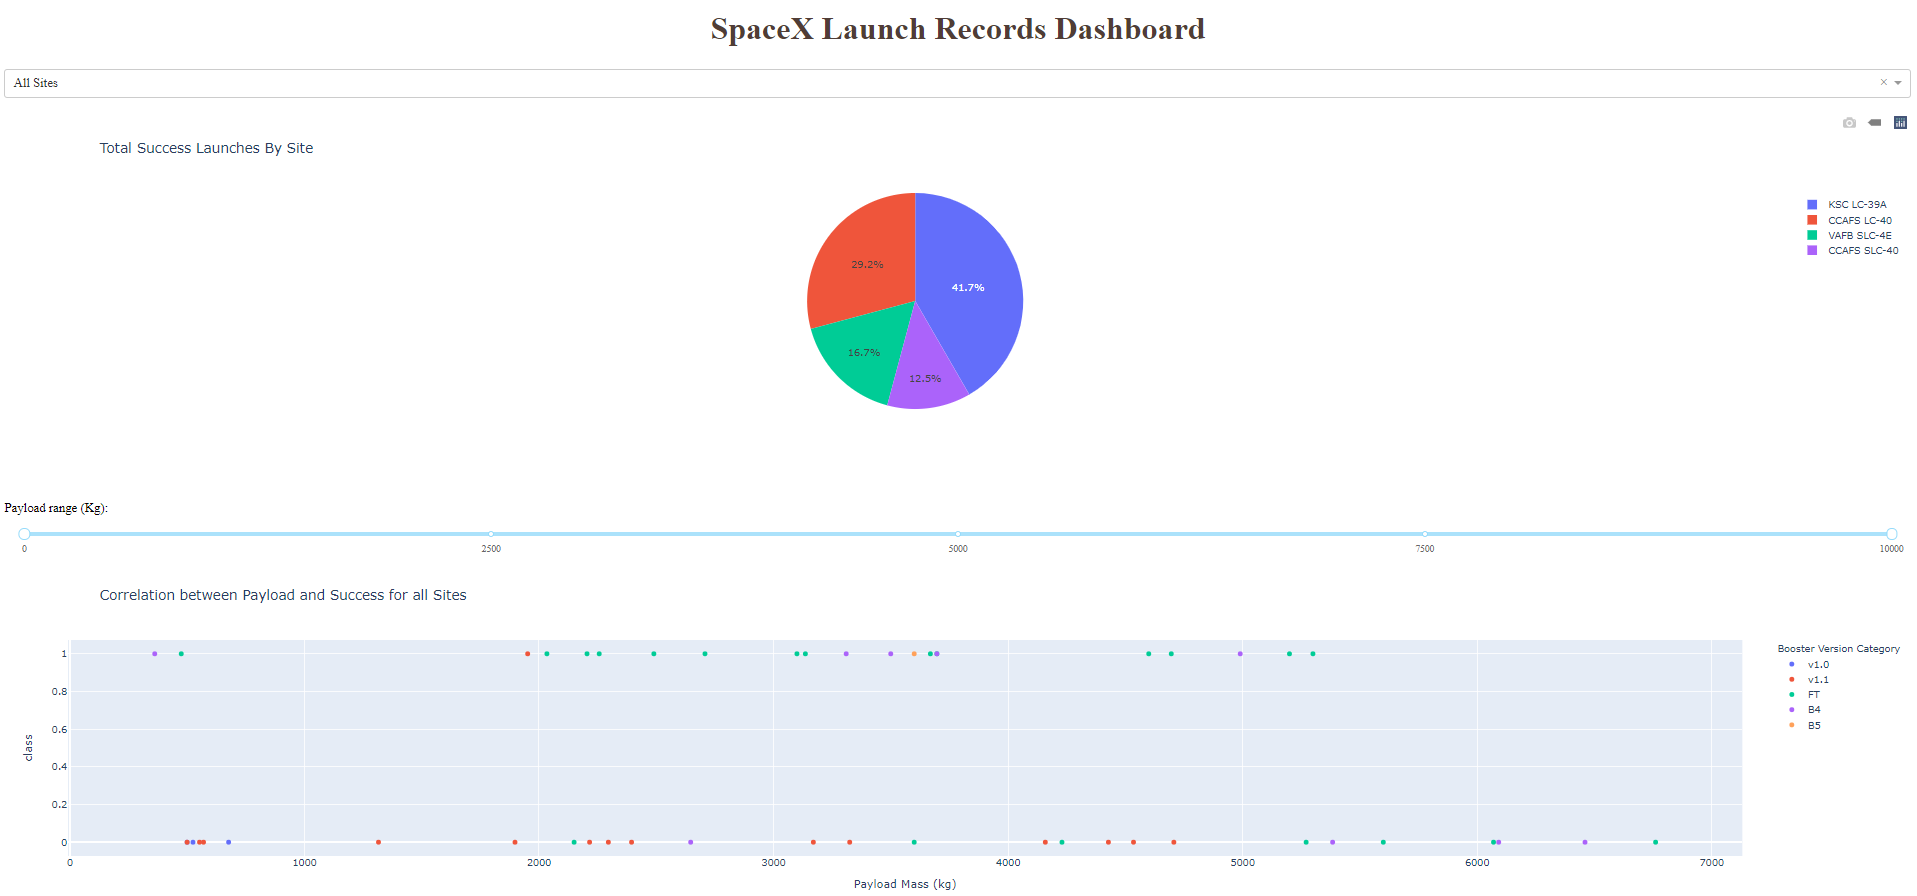


<span style = 'color: blue'><b>After visual analysis using the dashboard, you should be able to obtain some insights to answer the following five questions:</b></span>

 - <b>Which site has the largest successful launches?</b> 
 - <b>Which site has the highest launch success rate?</b> 
 - <b>Which payload range(s) has the highest launch success rate?</b>
 - <b>Which payload range(s) has the lowest launch success rate?</b>
 - <b>Which F9 Booster version (v1.0, v1.1, FT, B4, B5, etc.) has the highest launch success rate?</b>


Let's first import required Python packages for this lab:


In [2]:
import pandas as pd
import numpy as np
from dash import Dash, dcc, html, Input, Output

### <span style = 'color: green'>Download a skeleton dashboard application and dataset</b></span>

In [3]:
# Download and read the `spacex_launch_dash.csv`
import requests
import io
from io import BytesIO

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv'
response = requests.get(URL)
spacex_csv_file = BytesIO(response.content)
spacex_df = pd.read_csv(spacex_csv_file)
spacex_df.head()

,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0
2,2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0
3,3,4,CCAFS LC-40,0,500.0,F9 v1.0 B0006,v1.0
4,4,5,CCAFS LC-40,0,677.0,F9 v1.0 B0007,v1.0


## <span style = 'color: blue'>TASK 1: Add a Launch Site Drop-down Input Component</span>

<b>We have four different launch sites and we would like to first see which one has the largest success count. Then,
we would like to select one specific site and check its detailed success rate (class=0 vs. class=1).</b>

<span style = 'color: green'><b>As such, we will need a dropdown menu to let us select different launch sites.</b></span>
- <b>Find and complete a commented dcc.Dropdown(id='site-dropdown',...) input with following attributes:</b>
  - <b>id attribute</b> with value site-dropdown
  - <b>options attribute</b> is a list of dict-like option objects (with label and value attributes). You can set the label            and value all to be the launch site names in the spacex_df and you need to include the default All option. e.g.,
    
```
  options=[{'label': 'All Sites', 'value': 'ALL'},{'label': 'site1', 'value': 'site1'}, ...]
```
   - <b>value attribute</b> with default dropdown value to be ALL meaning all sites are selected 
   - <b>placeholder attribute</b> to show a text description about this input area, such as Select a Launch Site here
   - <b>searchable attribute</b> to be True so we can enter keywords to search launch sites


Your completed dropdown menu should look like the following screenshot:
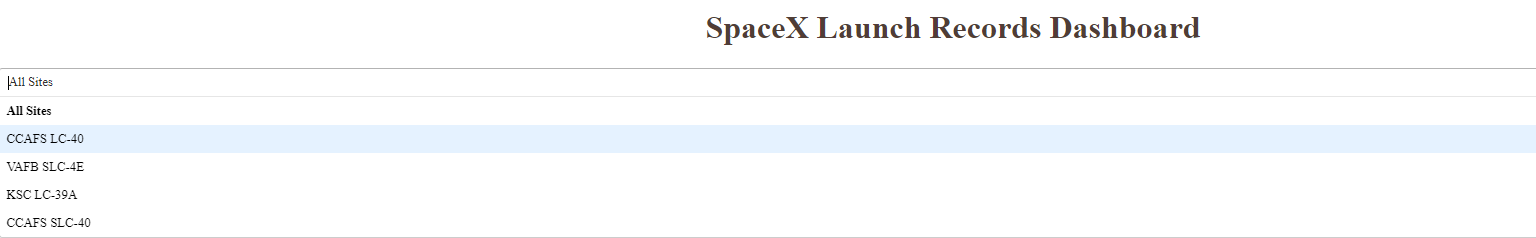

In [4]:
# Create a Launch Site Drop-down Input Component
from dash import Dash, dcc, html, Input, Output
import pandas as pd


# Create a list of dropdown options
launch_sites = spacex_df['Launch Site'].unique()

# Optional: Add "All Sites" option
dropdown_options = [{'label': 'All Sites', 'value': 'ALL'}] + \
                   [{'label': site, 'value': site} for site in launch_sites]

# Initialize Dash app (Initializes and prepares an interactive web app)
app = Dash(__name__) # This line creates an instance of a Dash application — it initializes the web app and sets it up to run.
# Dash: This is the main class provided by the Dash framework to build our app.
# __name__: This is a special built-in Python variable that holds the name of the current module (usually "__main__" when 
# running directly). It's passed so Dash knows how to locate static files like CSS, JS, or assets relative to your script.
# app: This is your Dash app object. We’ll use it to:
  # Set up your app layout
  # Define interactivity with callbacks
  # Run the app server using app.run_server()

# Define app layout
app.layout = html.Div(children=[
    html.H2("SpaceX Launch Dashboard"),
    
    html.Label("Select Launch Site:"),
    dcc.Dropdown(                 # dcc.Dropdown is used to create a dropdown menu (a select box) in a Dash web application.
        id='site-dropdown',
        options=dropdown_options,
        value='ALL',  # default value
        placeholder="Select a launch site",
        searchable=True
    ),

    html.Div(id='dropdown-output')
])

# dcc.Dropdown is usually combined with a callback to update something on the page (like a graph, map, or table) when a 
# user selects a new dropdown value.

# Define callback to update output based on dropdown selection
@app.callback(
    Output('dropdown-output', 'children'), # ← sends output here (Where the result goes)
    Input('site-dropdown', 'value')        # ← listens to dropdown (What triggers the function)
)
def update_output(selected_site):
    if selected_site == 'ALL':
        return "You selected: All Launch Sites"
    else:
        return f"You selected: {selected_site}"

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)

### <span style = 'color: purple'>Why html.Div(id='dropdown-output') is used:</span>
<span style = 'color: green'><b>This html.Div acts as a placeholder in your layout to display or update content dynamically based on the dropdown selection.</b></span>

<span style = 'color: purple'><b>How It Works:</b></span>
<span style = 'color: green'><br><b>id='dropdown-output': Gives the Div a unique ID so that a Dash callback can target it.</b></br></span>
<span style = 'color: gray'><b>You connect it with a callback like this:</b></span>
```
@app.callback(
    Output('dropdown-output', 'children'),  # ← sends output here
    Input('site-dropdown', 'value')         # ← listens to dropdown
)
def update_output(selected_site):
    return f"You selected: {selected_site}"
```    
<span style = 'color: gray'><b>So when a user selects an item from the dropdown, Dash:</b></span>
  - <b>Triggers the callback function.</b>
  - <b>Passes the selected value to the function.</b>
  - <b>The function returns a string.</b>
  - <b>That string is rendered inside the html.Div with id='dropdown-output'.</b>

<span style = 'color: darkred'><b>Without it:
If you remove html.Div(id='dropdown-output'), the callback will have no visible place to display its output on the page.</b></span>

### <span style = 'color: purple'>Dash Logic Behind the Scenes:</span>
  - <span style = 'color: green'><b>When a user selects a value from the dropdown (id='site-dropdown'), Dash monitors that change     via Input('site-dropdown', 'value').</b></sapn>

  - <span style = 'color: green'><b>Dash then calls the function update_output(selected_site) with the selected value (e.g., "CCAFS LC-40", "ALL", etc.) as the argument selected_site.</b></sapn>

  - <span style = 'color: green'><b>The function update_output() returns some content (in this case, a string like "You selected: CCAFS LC-40").</b></sapn>

  - <span style = 'color: green'><b>That content is inserted into the component with id='dropdown-output', specifically into its .children property.</b></sapn>

## <span style = 'color: blue'>TASK 2: Add a callback function to render success-pie-chart based on selected site dropdown</b>

<span style = 'color: green'><b>The general idea of this callback function is to get the selected launch site from site-dropdown and render a pie chart visualizing launch success counts.</b></span>

<span style = 'color: green'><b>Dash callback function is a type of Python function which will be automatically called by
Dash whenever receiving an input component updates, such as a click or dropdown selecting event.</b></span>

<span style = 'color: green'><b>Let’s add a callback function in spacex_dash_app.py including the following application logic:</b></span>
 - <span style = 'color: purple'><b>Input is set to be the site-dropdown dropdown, i.e., Input(component_id='site-dropdown', component_property='value')</b></span>
 - <span style = 'color: purple'><b>Output to be the graph with id success-pie-chart, i.e., Output(component_id='success-pie-chart', component_property='figure')</b></span>
 - <span style = 'color: purple'><b>A If-Else statement to check if ALL sites were selected or just a specific launch site was selected</b></span>
    - <span style = 'color: darkorange'><b>If ALL sites are selected, we will use all rows in the dataframe spacex_df to render        and return a pie chart graph to show the total success launches (i.e., the total count of class column)</b></span>
    - <span style = 'color: darkorange'><b>If a specific launch site is selected, you need to filter the dataframe spacex_df            first in order to include the only data for the selected site. Then, render and return a pie chart graph to show the            success (class=1) count and failed (class=0) count for the selected site.</b></span>

<b>The rendered pie chart should look like the following screenshots:</b>
   - <b>Pie chart for all sites are selected</b>
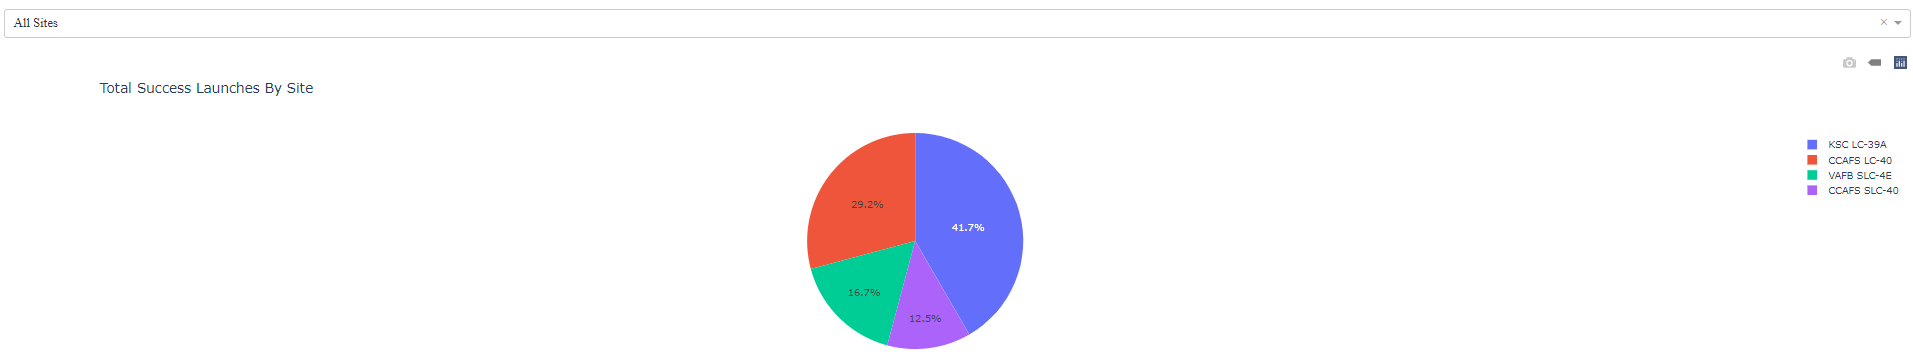

  - <b>Pie chart for is selected</b>
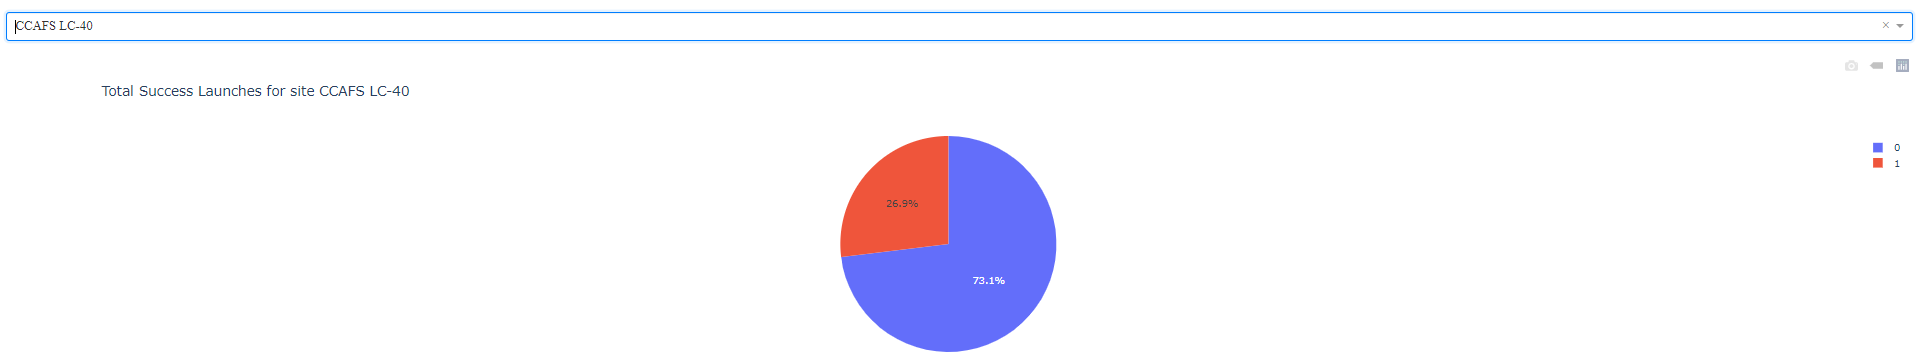

In [5]:
import plotly.express as px

# Create a list of dropdown options
launch_sites = spacex_df['Launch Site'].unique()

# Optional: Add "All Sites" option
dropdown_options = [{'label': 'All Sites', 'value': 'ALL'}] + \
                   [{'label': site, 'value': site} for site in launch_sites]

# Initialize Dash app 
app = Dash(__name__) 

# Define app layout
app.layout = html.Div(children=[
    html.H2("SpaceX Launch Dashboard"),
    
    html.Label("Select Launch Site:"),
    dcc.Dropdown(                 
        id='site-dropdown',
        options=dropdown_options,
        value='ALL',  # default value
        placeholder="Select a launch site",
        searchable=True
    ),
    html.Br(),

    # Graph to display success pie chart
    dcc.Graph(id='success-pie-chart')
])

# Callback function to update pie chart
@app.callback(
    Output('success-pie-chart', 'figure'),
    Input('site-dropdown', 'value')
)
def get_pie_chart(entered_site):
    if entered_site == 'ALL':
        # Total success launches per site
        success_counts = spacex_df[spacex_df['class'] == 1] \
            .groupby('Launch Site').size().reset_index(name='Successes')

        fig = px.pie(
            success_counts,
            values='Successes',
            names='Launch Site',
            title='Total Successful Launches by Site'
        )
    else:
        # Filter for selected site and count success/failure
        filtered_df = spacex_df[spacex_df['Launch Site'] == entered_site]
        outcome_counts = filtered_df['class'].value_counts().reset_index()
        outcome_counts.columns = ['Outcome', 'Count']
        outcome_counts['Outcome'] = outcome_counts['Outcome'].replace({1: 'Success', 0: 'Failure'})

        fig = px.pie(
            outcome_counts,
            values='Count',
            names='Outcome',
            title=f'Launch Outcomes for {entered_site}'
        )

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

## <span style = 'color: blue'>TASK 3: Add a Range Slider to Select Payload</span>

<span style = 'color: green'><b>Next, we want to find if variable payload is correlated to mission outcome. From a dashboard point of view, we want to be able to easily select different payload range and see if we can identify some visual patterns.</b></span>

<span style = 'color: purple'><b>Find and complete a commented dcc.RangeSlider(id='payload-slider',...) input with the following attribute:</b></span>
 - <span style = 'color: purple'><b>id to be payload-slider</b></span>
 - <span style = 'color: purple'><b>min indicating the slider starting point, we set its value to be 0 (Kg)</b></span>
 - <span style = 'color: purple'><b>max indicating the slider ending point to, we set its value to be 10000 (Kg)</b></span>
 - <span style = 'color: purple'><b>step indicating the slider interval on the slider, we set its value to be 1000 (Kg)</b></span>
 - <span style = 'color: purple'><b>value indicating the current selected range, we could set it to be min_payload and max_payload</b></span>

You completed payload range slider should be similar the following screenshot:
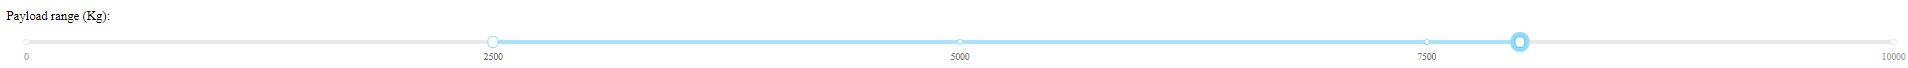

In [6]:
# Payload range for the slider
min_payload = spacex_df['Payload Mass (kg)'].min()
max_payload = spacex_df['Payload Mass (kg)'].max()

# Dropdown options
launch_sites = spacex_df['Launch Site'].unique()
dropdown_options = [{'label': 'All Sites', 'value': 'ALL'}] + \
                   [{'label': site, 'value': site} for site in launch_sites]

# Initialize app
app = Dash(__name__)

# App layout
app.layout = html.Div(children= [
    html.H2("SpaceX Launch Dashboard", style={'textAlign': 'center'}),

    html.Label("Select Launch Site:"),
    dcc.Dropdown(
        id='site-dropdown',
        options=dropdown_options,
        value='ALL',
        placeholder="Select a launch site",
        searchable=True
    ),

    html.Br(),

    html.Label("Select Payload Range (kg):"),
    dcc.RangeSlider(
        id='payload-slider',
        min=min_payload,
        max=max_payload,
        step=500 ,
        marks={int(min_payload): f'{int(min_payload)}', int(max_payload): f'{int(max_payload)}'},
        value=[min_payload, max_payload]
    ),

])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

## <span style = 'color: blue'>TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot</span>

<span style = 'color: green'><b>Next, we want to plot a scatter plot with the x axis to be the payload and the y axis to be the launch outcome (i.e., class column).</b></span>

<span style = 'color: green'><b>As such, we can visually observe how payload may be correlated with mission outcomes for selected site(s).</b></span>

<span style = 'color: green'><b>In addition, we want to color-label the Booster version on each scatter point so that we may observe mission outcomes with different boosters.</b></span>

<span style = 'color: purple'><b>Now, let’s add a call function including the following application logic:</b></span>
  - <span style = 'color: purple'><b>Input to be [Input(component_id='site-dropdown', component_property='value'), Input(component_id="payload-slider", component_property="value")]</b></span>
<span style = 'color: purple'><br><b>Note that we have two input components, one to receive selected launch site and another to receive selected payload range</b></br></span>
  - <span style = 'color: purple'><b>Output to be Output(component_id='success-payload-scatter-chart', component_property='figure')</b></span>
  - <span style = 'color: purple'><b>A If-Else statement to check if ALL sites were selected or just a specific launch site was selected</b></span>
    - <span style = 'color: purple'><b>If ALL sites are selected, render a scatter plot to display all values for variable Payload Mass (kg) and variable class.</b></span>
<span style = 'color: purple'><br><b>In addition, the point color needs to be set to the booster version i.e., color="Booster Version Category"</b></br></span>
    - <span style = 'color: purple'><b>If a specific launch site is selected, you need to filter the spacex_df first, and render a scatter chart to show values Payload Mass (kg) and class for the selected site, and color-label the point using Boosster Version Category likewise.</b></span>

You rendered scatter point should look like the following screenshot:
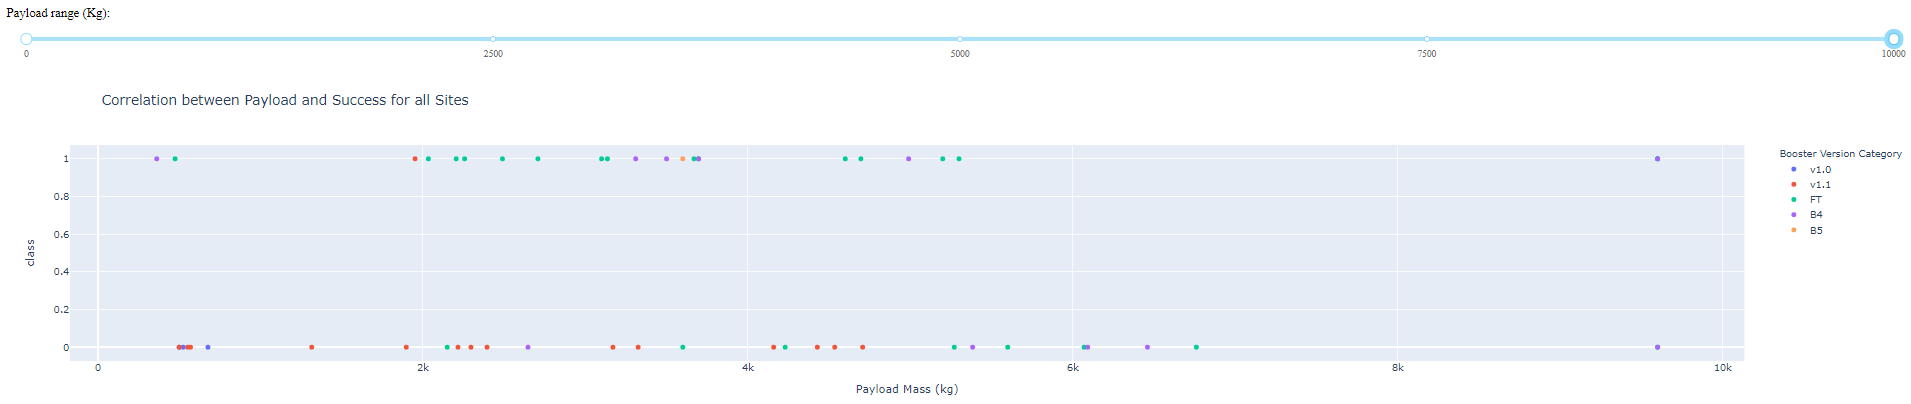   

In [10]:
# Payload range for the slider
min_payload = spacex_df['Payload Mass (kg)'].min()
max_payload = spacex_df['Payload Mass (kg)'].max()

# Dropdown options
launch_sites = spacex_df['Launch Site'].unique()
dropdown_options = [{'label': 'All Sites', 'value': 'ALL'}] + \
                   [{'label': site, 'value': site} for site in launch_sites]

# Initialize app
app = Dash(__name__)

# App layout
app.layout = html.Div(children= [
    html.H2("SpaceX Launch Dashboard", style={'textAlign': 'center'}),

    html.Label("Select Launch Site:"),
    dcc.Dropdown(
        id='site-dropdown',
        options=dropdown_options,
        value='ALL',
        placeholder="Select a launch site",
        searchable=True
    ),

    html.Br(),

    html.Label("Select Payload Range (kg):"),
    dcc.RangeSlider(
        id='payload-slider',
        min=min_payload,
        max=max_payload,
        step=500,
        marks={int(min_payload): f'{int(min_payload)}', int(max_payload): f'{int(max_payload)}'},
        value=[min_payload, max_payload]
    ),

    html.Br(),

    dcc.Graph(id='success-payload-scatter-chart')
])

# Callback to update scatter chart based on dropdown and slider
@app.callback(
    Output('success-payload-scatter-chart', 'figure'),
    Input('site-dropdown', 'value'),
    Input('payload-slider', 'value')
)
def update_scatter_chart(entered_site, payload_range): 
    # In your Dash app, payload_range comes from the dcc.RangeSlider, which returns a list with two values: 
    # [value_min, value_max]
    # We're using low and high to filter the DataFrame:
    # low = payload_range[0]
    # high = payload_range[1]
    low, high = payload_range

    # Filter by payload range
    filtered_df = spacex_df[
        (spacex_df['Payload Mass (kg)'] >= low) &
        (spacex_df['Payload Mass (kg)'] <= high)
    ]

    # If a specific site is selected, filter further
    if entered_site != 'ALL':
        filtered_df = filtered_df[filtered_df['Launch Site'] == entered_site]

    # Create scatter plot
    fig = px.scatter(
        filtered_df,
        x='Payload Mass (kg)',
        y='class',
        color='Booster Version Category',
        symbol='class',
        title='Correlation between Payload and Success',
        labels={'class': 'Launch Success'} # Means: Wherever Plotly would normally display the column name 'class' (on axes,   
                                           # tooltips, legends), it will instead show 'Launch Success'.
    )
    return fig


# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
    

## <span style = 'color: blue'>Finding Insights Visually</span>
<b>Now with the dashboard completed, you should be able to use it to analyze SpaceX launch data, and answer the following questions:</b>

 - <b>Which site has the largest successful launches?</b>
 - <b>Which site has the highest launch success rate?</b>
 - <b>Which payload range(s) has the highest launch success rate?</b>
 - <b>Which payload range(s) has the lowest launch success rate?</b>
 - <b>Which F9 Booster version (v1.0, v1.1, FT, B4, B5, etc.) has the highest</b>
 - <b>launch success rate?</b>

## Plotly Dash Reference
### Dropdown (input) component
Refer [here](https://dash.plotly.com/dash-core-components/)dropdown for more details about <span style = 'color: darkorange'><b>dcc.Dropdown()</b></sapn>

### Range slider (input) component
Refer [here](https://dash.plotly.com/dash-core-components/)rangeslider for more details about <span style = 'color:darkorange'><b>dcc.RangeSlider()</b></sapn>

### Pie chart (output) component
Refer [here](https://plotly.com/python/pie-charts/) for more details about plotly pie charts

### Scatter chart (output) component
Refer [here](https://plotly.com/python/line-and-scatter/) for more details about plotly scatter charts

## Authors


[Yan Luo](https://www.linkedin.com/in/yan-luo-96288783/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
